In [2]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
#import data_loading_plotting_fct as dlp

In [3]:
def load_fitnesses(folder):
    fit_file = open(folder + "/fitnesses")
    idx_file = open(folder + "/indexes")
    
    fit_lines = fit_file.readlines()
    idx_lines = idx_file.readlines()

    fit_file.close()
    idx_file.close()

    data_line = []
    iter = 0
    prev_idx = []
    for fit_l,idx_l in zip(fit_lines,idx_lines):
        for fit, idx in zip(fit_l.split(","),idx_l.split(",")):
            data_line.append([iter,int(idx),float(fit)])
        iter+=len(list(set(idx_l.split(',')) ^ set(prev_idx)))
        prev_idx = idx_l.split(",")
    return data_line

def cap_to(N,n):
    return N*int(n/N)

def load_data_agg(folder):
    fit_file = open(folder + "/fitnesses")
    idx_file = open(folder + "/indexes")
    ld_file = open(folder + "/learning_delta")

    fit_lines = fit_file.readlines()
    idx_lines = idx_file.readlines()
    ld_lines = ld_file.readlines()


    fit_file.close()
    idx_file.close()
    ld_file.close()

    data_line = []
    iter = 0
    prev_idx = []
    for fit_l,idx_l in zip(fit_lines,idx_lines):
        fitnesses = [float(fit) for fit in fit_l.split(",")]
        data_line.append([cap_to(200,iter),np.mean(fitnesses),np.median(fitnesses),np.var(fitnesses),np.max(fitnesses),np.min(fitnesses)])
        iter+=len(list(set(idx_l.split(',')) ^ set(prev_idx)))
        prev_idx = idx_l.split(",")
    return data_line


# Learning

In [7]:
data_lines = []
for variant in os.listdir("/home/leni/m2w_logs/learning_1/"):
    foldername = "/home/leni/m2w_logs/learning_1/" + variant
    for replicate in os.listdir(foldername):
        fit_lines = load_fitnesses_agg(foldername + "/" + replicate)
        data_lines += [[variant,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["variant","replicate","iteration","mean fit","median fit","variance fit","max fit","min fit"])

In [8]:
print(fit_data)

       variant                              replicate  iteration   mean fit   
0          awg  m2w_2023_9_18_14_28_52_137722_2955371          0   6.269387  \
1          awg  m2w_2023_9_18_14_28_52_137722_2955371        200   6.272020   
2          awg  m2w_2023_9_18_14_28_52_137722_2955371        200   6.273266   
3          awg  m2w_2023_9_18_14_28_52_137722_2955371        200   6.274207   
4          awg  m2w_2023_9_18_14_28_52_137722_2955371        200   6.274207   
...        ...                                    ...        ...        ...   
369092     awn   m2w_2023_9_18_9_29_18_706252_5123776       1800  18.507755   
369093     awn   m2w_2023_9_18_9_29_18_706252_5123776       1800  18.507755   
369094     awn   m2w_2023_9_18_9_29_18_706252_5123776       1800  18.507755   
369095     awn   m2w_2023_9_18_9_29_18_706252_5123776       1800  18.507755   
369096     awn   m2w_2023_9_18_9_29_18_706252_5123776       1800  18.507755   

        median fit  variance fit    max fit    min 

(0.0, 5000.0)

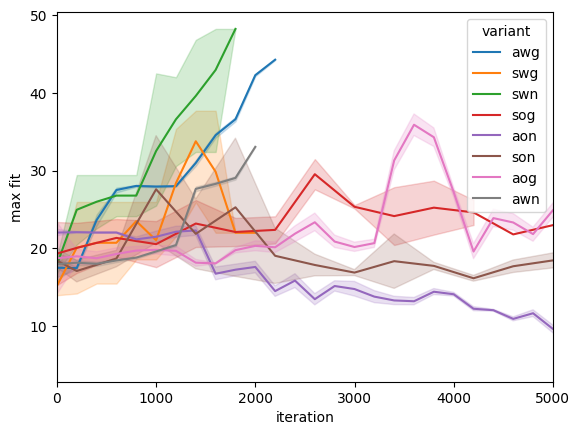

In [9]:
ax = sns.lineplot(data=fit_data,x="iteration",y="max fit",hue="variant")
ax.set_xlim([0,5000])

(0.0, 5000.0)

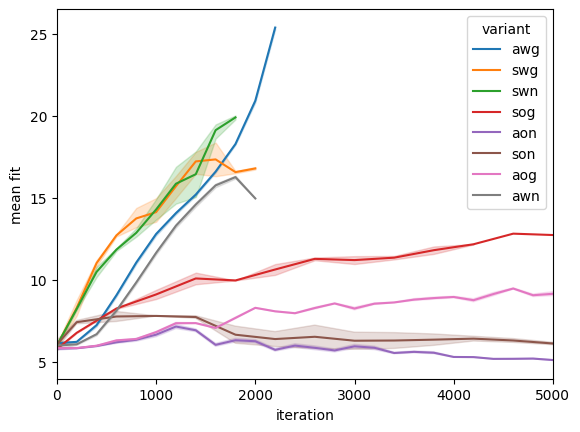

In [10]:
ax = sns.lineplot(data=fit_data,x="iteration",y="mean fit",hue="variant")
ax.set_xlim([0,5000])

(0.0, 5000.0)

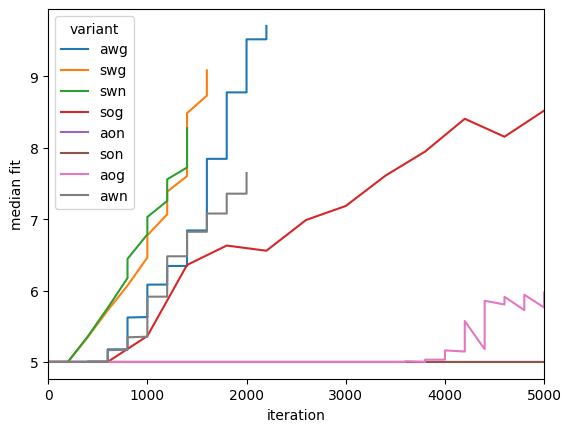

In [51]:
ax = sns.lineplot(data=fit_data,x="iteration",y="median fit",hue="variant"
ax.set_xlim([0,5000])

(0.0, 5000.0)

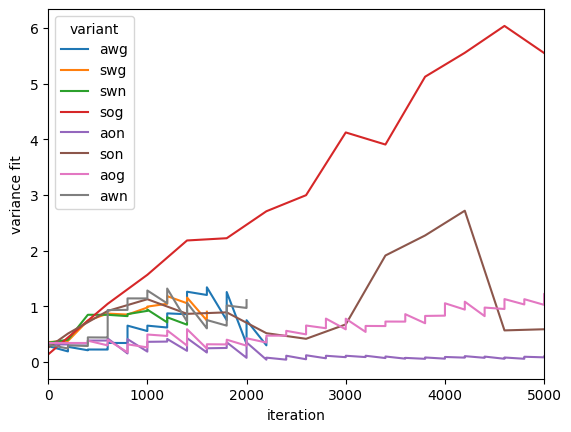

In [52]:
ax = sns.lineplot(data=fit_data,x="iteration",y="variance fit",hue="variant",errorbar=None,estimator=None)
ax.set_xlim([0,5000])

<Axes: xlabel='variant', ylabel='max fit'>

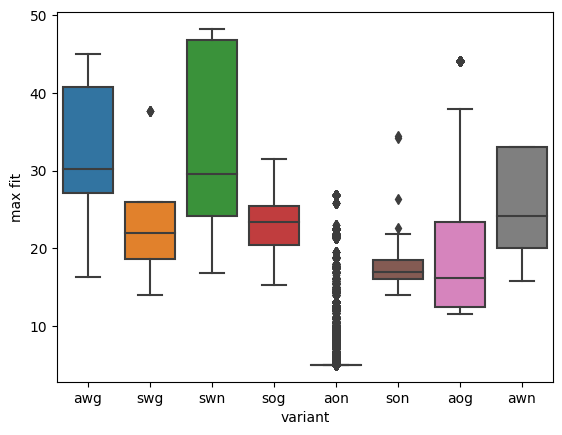

In [11]:
sns.boxplot(data=fit_data,x="variant",y="max fit")

<Axes: xlabel='variant', ylabel='mean fit'>

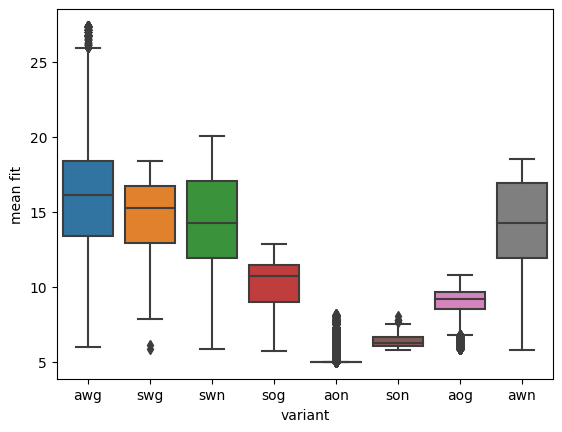

In [12]:
sns.boxplot(data=fit_data,x="variant",y="mean fit")

<Axes: xlabel='variant', ylabel='median fit'>

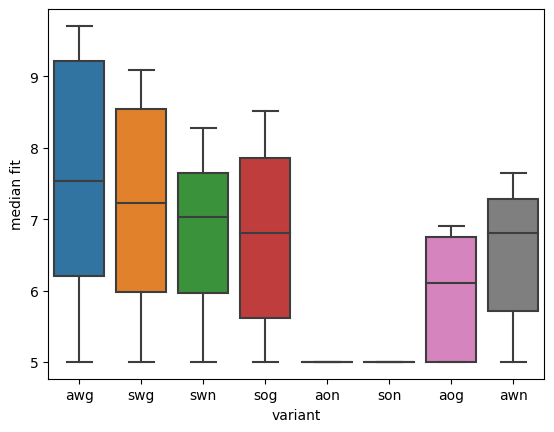

In [25]:
sns.boxplot(data=fit_data,x="variant",y="median fit")

# No Learning

In [37]:
data_lines = []
for variant in os.listdir("/home/leni/m2w_logs/no_learning/"):
    foldername = "/home/leni/m2w_logs/no_learning/" + variant
    for replicate in os.listdir(foldername):
        fit_lines = load_fitnesses_agg(foldername + "/" + replicate)
        data_lines += [[variant,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["variant","replicate","iteration","mean fit","median fit","variance fit","max fit","min fit"])

(0.0, 15000.0)

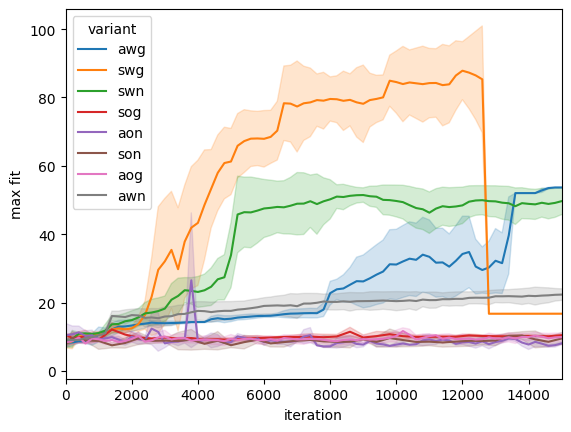

In [42]:
ax = sns.lineplot(data=fit_data,x="iteration",y="max fit",hue="variant",errorbar="sd")
ax.set_xlim([0,15000])

(0.0, 15000.0)

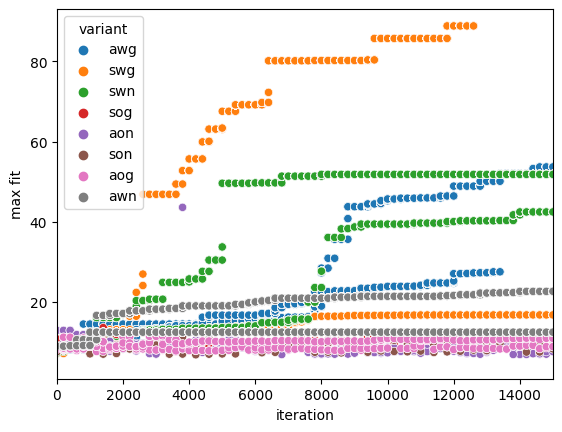

In [43]:
ax = sns.scatterplot(data=fit_data,x="iteration",y="max fit",hue="variant")
ax.set_xlim([0,15000])

(0.0, 15000.0)

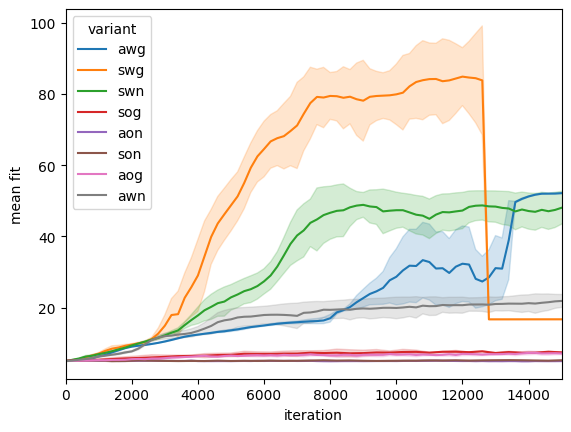

In [45]:
ax = sns.lineplot(data=fit_data,x="iteration",y="mean fit",hue="variant",errorbar="sd")
ax.set_xlim([0,15000])

(0.0, 15000.0)

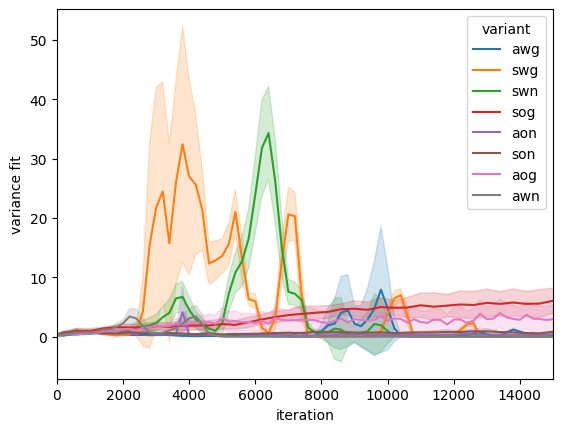

In [47]:
ax = sns.lineplot(data=fit_data,x="iteration",y="variance fit",hue="variant",errorbar="sd")
ax.set_xlim([0,15000])

<Axes: xlabel='variant', ylabel='max fit'>

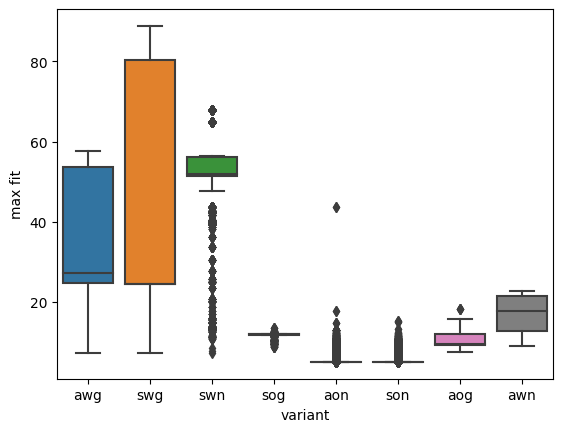

In [44]:
sns.boxplot(data=fit_data,x="variant",y="max fit")